In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
PR_HS_LEN_performance = pd.read_csv('data/performance_PR_HS_LEN2.csv.gz')
#PR_HS_LEN_performance = PR_HS_LEN_performance[PR_HS_LEN_performance.tot_comments<200]
PR_HS_LEN_performance = PR_HS_LEN_performance.sort_values('tot_comments')
PR_HS_LEN_performance.shape

(383, 5)

## Log Chart

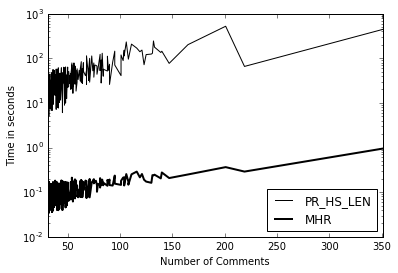

In [70]:
fig, ax = plt.subplots()
labels = []

ax = PR_HS_LEN_performance.plot(ax=ax, kind='line', x='tot_comments', y='elapsed_phl', c="k")
labels.append("PR_HS_LEN")

ax = PR_HS_LEN_performance.plot(ax=ax, kind='line', x='tot_comments', y='elapsed_mhr', c="k", linewidth=2)
labels.append("MHR")

lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.set_xlabel("Number of Comments")
ax.set_ylabel("Time in seconds")
ax.set_yscale('log')
plt.show()

## Smooth Log Chart

In [71]:
def smooth(x,beta):
    """ kaiser window smoothing """
    window_len=11
    # extending the data at beginning and at the end
    # to apply the window at the borders
    s = np.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    w = np.kaiser(window_len,beta)
    y = np.convolve(w/w.sum(),s,mode='valid')
    return y[5:len(y)-5]

In [72]:
PR_HS_LEN_performance['smooth_mhr'] = smooth(PR_HS_LEN_performance['elapsed_mhr'].values,25)
PR_HS_LEN_performance['smooth_phl'] = smooth(PR_HS_LEN_performance['elapsed_phl'].values,25)

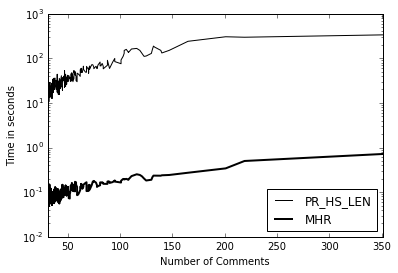

In [73]:
fig, ax = plt.subplots()
labels = []

ax = PR_HS_LEN_performance.plot(ax=ax, kind='line', x='tot_comments', y='smooth_phl', c="k")
labels.append("PR_HS_LEN")

ax = PR_HS_LEN_performance.plot(ax=ax, kind='line', x='tot_comments', y='smooth_mhr', c="k", linewidth=2)
labels.append("MHR")

lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.set_xlabel("Number of Comments")
ax.set_ylabel("Time in seconds")
ax.set_yscale('log')
plt.show()